In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
ipl=pd.read_csv("C:/Users/admin/Desktop/EDA projects/IPL Auction2022/ipl_2022_dataset.csv")

In [3]:
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
#total no of rows and col
ipl.shape

(633, 8)

In [5]:
#total n of players
ipl.shape[0]

633

In [6]:
#to check non-null,data type,no of col
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [7]:
# drop col unnamed
ipl.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
ipl.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [9]:
#no of null values in each col
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [10]:
#replacing null values
ipl["COST IN ₹ (CR.)"]=ipl["COST IN ₹ (CR.)"].fillna(0)
ipl["Cost IN $ (000)"]=ipl["Cost IN $ (000)"].fillna(0)
ipl["2021 Squad"]=ipl["2021 Squad"].fillna("Not participated")

In [11]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

creating new column


In [12]:

ipl["Team"].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [13]:
ipl["Team"]!="Unsold"

0       True
1       True
2       True
3       True
4       True
       ...  
628    False
629    False
630    False
631    False
632    False
Name: Team, Length: 633, dtype: bool

In [14]:
ipl[ipl["Team"]!="Unsold"]["Team"].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [15]:
teams=ipl[ipl["Team"]!="Unsold"]["Team"].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [16]:
#ipl.head()
ipl["Status"]=ipl["Team"].replace(teams,"sold")

In [17]:
ipl["Status"].unique()

array(['sold', 'Unsold'], dtype=object)

Check duplicated players

In [18]:
ipl[ipl["Player"].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold


How many types of players participated

In [19]:
ipl["TYPE"].nunique()

4

No. of players in each type

In [20]:
ipl["TYPE"].value_counts()

ALL-ROUNDER     242
BOWLER          215
BATTER          112
WICKETKEEPER     64
Name: TYPE, dtype: int64

In [21]:
#making table of above
types=ipl["TYPE"].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


Pie chart for types

[]

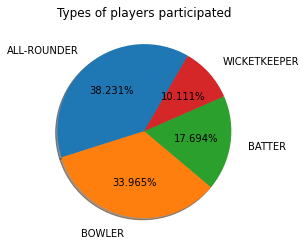

In [22]:
plt.pie(types.values,labels=types.index,labeldistance=1.2,   ="%0.3f%%",shadow=True,startangle=60)
plt.title("Types of players participated")
plt.plot()

Bar graph for sold and unsold

Text(0.5, 1.0, 'Sold vs Unsold')

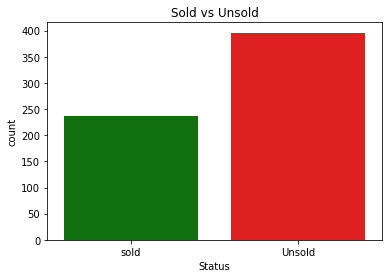

In [23]:
sns.countplot(ipl["Status"],palette=["Green","Red"])
plt.title("Sold vs Unsold")

In [24]:
ipl.groupby("Status")["Player"].count()

Status
Unsold    396
sold      237
Name: Player, dtype: int64

Total no. of players bought by each team

[]

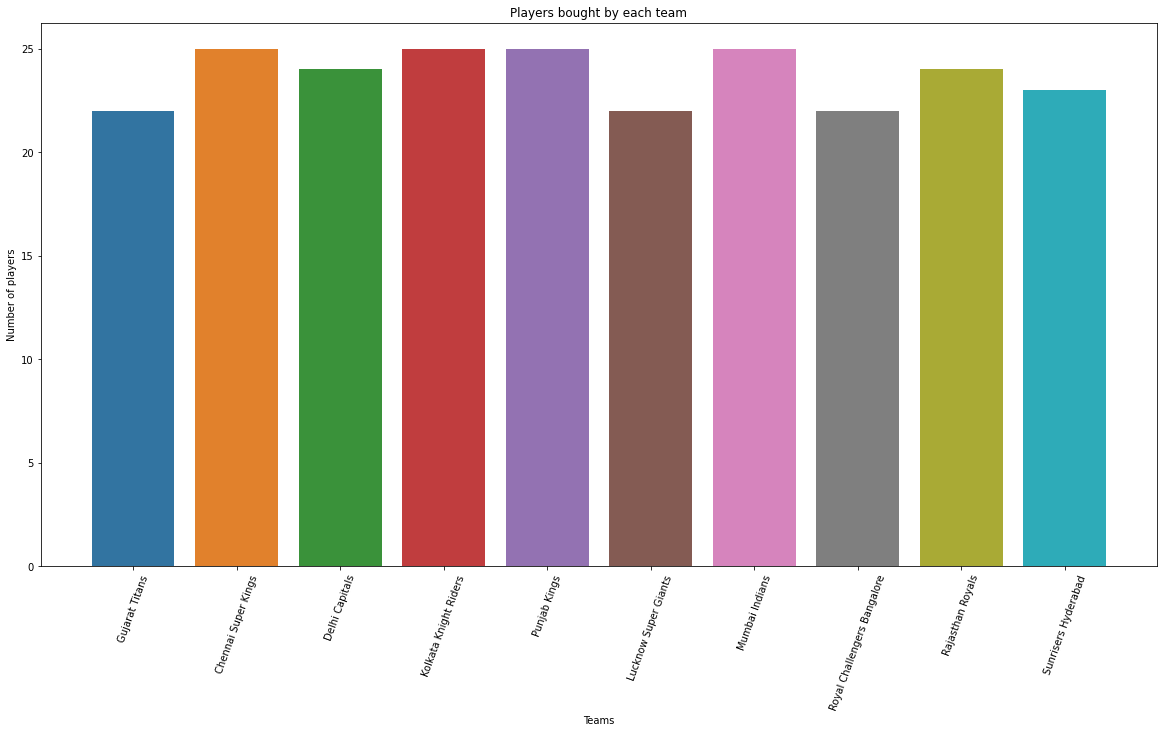

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(ipl[ipl["Team"]!="Unsold"]["Team"])
plt.xlabel("Teams")
plt.ylabel("Number of players")
plt.title("Players bought by each team")
plt.xticks(rotation=70)
plt.plot()

In [26]:
ipl.groupby("Team")["Player"].count()

Team
Chennai Super Kings             25
Delhi Capitals                  24
Gujarat Titans                  22
Kolkata Knight Riders           25
Lucknow Super Giants            22
Mumbai Indians                  25
Punjab Kings                    25
Rajasthan Royals                24
Royal Challengers Bangalore     22
Sunrisers Hyderabad             23
Unsold                         396
Name: Player, dtype: int64

#creating 3 new columns

In [27]:
ipl["Base Price"]

0      Draft Pick
1      Draft Pick
2            2 Cr
3         40 Lakh
4      Draft Pick
          ...    
628       20 Lakh
629       20 Lakh
630       20 Lakh
631       20 Lakh
632       20 Lakh
Name: Base Price, Length: 633, dtype: object

In [28]:
ipl["Retention"]=ipl["Base Price"]

In [29]:
ipl["Retention"].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh','1.5 Cr'],"From Auction",inplace=True)

In [30]:
ipl["Retention"]

0        Draft Pick
1        Draft Pick
2      From Auction
3      From Auction
4        Draft Pick
           ...     
628    From Auction
629    From Auction
630    From Auction
631    From Auction
632    From Auction
Name: Retention, Length: 633, dtype: object

In [31]:
#treating base price
ipl["Base Price"].replace("Draft Pick",0,inplace=True)

In [32]:
ipl["Base Price"].unique()

array([0, '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', '50 Lakh',
       '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [33]:
ipl["Price_value"]=ipl["Base Price"].apply(lambda x:str(x).split(" ")[0])
ipl["Price_value_unit"]=ipl["Base Price"].apply(lambda x:str(x).split(" ")[-1])

In [34]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,20,Lakh
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,20,Lakh
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,20,Lakh
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not participated,Unsold,Unsold,From Auction,20,Lakh


In [35]:
ipl["Price_value"].replace("Retained",0,inplace=True)

In [36]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [37]:
#total player retained nad bought
ipl.groupby(["Team","Retention"])["Player"].count()

Team                         Retention   
Chennai Super Kings          From Auction     21
                             Retained          4
Delhi Capitals               From Auction     20
                             Retained          4
Gujarat Titans               Draft Pick        3
                             From Auction     19
Kolkata Knight Riders        From Auction     21
                             Retained          4
Lucknow Super Giants         Draft Pick        3
                             From Auction     19
Mumbai Indians               From Auction     21
                             Retained          4
Punjab Kings                 From Auction     23
                             Retained          2
Rajasthan Royals             From Auction     21
                             Retained          3
Royal Challengers Bangalore  From Auction     19
                             Retained          3
Sunrisers Hyderabad          From Auction     20
                           

[]

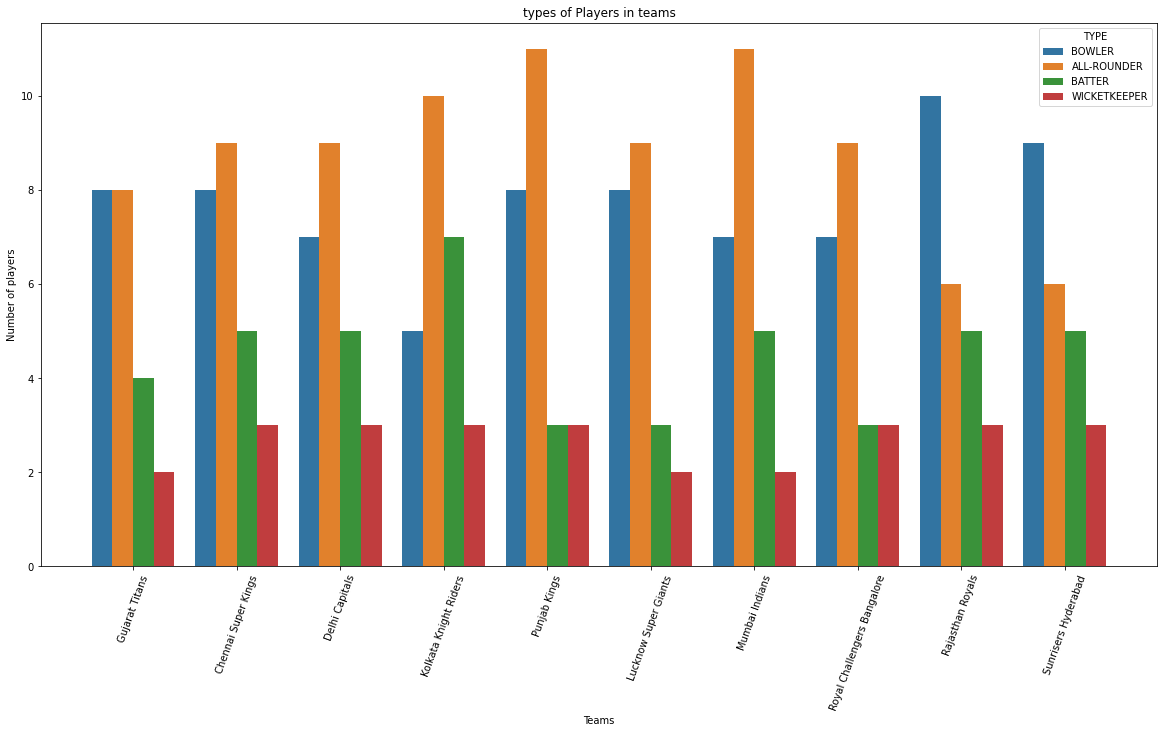

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(ipl[ipl["Team"]!="Unsold"]["Team"],hue=ipl["TYPE"])
plt.xlabel("Teams")
plt.ylabel("Number of players")
plt.title("types of Players in teams")
plt.xticks(rotation=70)
plt.plot()

In [39]:
ipl.groupby([ipl[ipl["Team"]!="Unsold"]["Team"],"TYPE"])["Player"].count()

Team                         TYPE        
Chennai Super Kings          ALL-ROUNDER      9
                             BATTER           5
                             BOWLER           8
                             WICKETKEEPER     3
Delhi Capitals               ALL-ROUNDER      9
                             BATTER           5
                             BOWLER           7
                             WICKETKEEPER     3
Gujarat Titans               ALL-ROUNDER      8
                             BATTER           4
                             BOWLER           8
                             WICKETKEEPER     2
Kolkata Knight Riders        ALL-ROUNDER     10
                             BATTER           7
                             BOWLER           5
                             WICKETKEEPER     3
Lucknow Super Giants         ALL-ROUNDER      9
                             BATTER           3
                             BOWLER           8
                             WICKETKEEPER     

In [40]:
#Highest amount spent on single person by each team(not retained players)
ipl[ipl["Retention"]=="From Auction"].groupby(["Team"])["COST IN ₹ (CR.)"].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [41]:
#player retained at maximum price


In [42]:
ipl[ipl["Retention"]=="Retained"].sort_values(by="COST IN ₹ (CR.)",ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,0,Retained


In [43]:
#top 5 bowlers by price

In [44]:
ipl[(ipl["Retention"]=="From Auction") & (ipl["TYPE"]=="BOWLER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,2,Cr
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,2,Cr
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,From Auction,1,Cr
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,20,Lakh


In [45]:
#top 5 Batter by price

In [46]:
ipl[(ipl["Retention"]=="From Auction") & (ipl["TYPE"]=="BATTER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,sold,From Auction,2,Cr
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,sold,From Auction,1.5,Cr
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,sold,From Auction,40,Lakh
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,sold,From Auction,2,Cr
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,sold,From Auction,2,Cr


In [47]:
#top 5 allrounder by price

In [48]:
ipl[(ipl["Retention"]=="From Auction") & (ipl["TYPE"]=="ALL-ROUNDER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,sold,From Auction,1,Cr
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,From Auction,1,Cr
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,From Auction,2,Cr
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,sold,From Auction,40,Lakh
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh


In [49]:
# player not picked in this Auction
#ipl= ipl.rename(columns={"2021 squad":"Prev_team"})

In [50]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Price_value,Price_value_unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [51]:
ipl[(ipl.Team=="Unsold") & (ipl["2021 Squad"] != "Not participated")][["Player","2021 Squad"]]

,Player,2021 Squad
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB
